# Tutorial: Images (Solution)

Open the image located at `"../../Lessons/data/HelixNebula.jpg"`, convert the image to a `numpy` array and store that as a variable called `imageArray`.

In [1]:
import numpy as np
from PIL import Image

image = Image.open("../../Lessons/data/HelixNebula.jpg")
imageArray = np.array(image)

Plot `imageArray`.

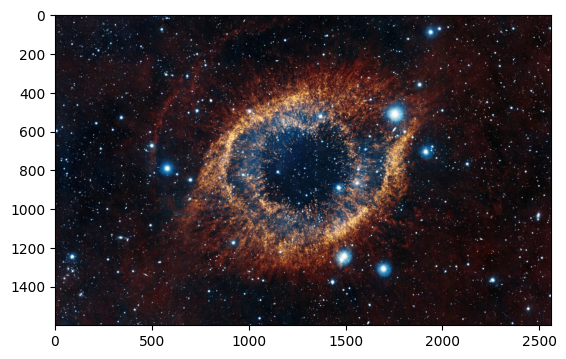

In [2]:
import matplotlib.pyplot as pl

pl.imshow(imageArray)
pl.show()

Crop the image to just the center 250x250 pixels of the image array and save it to a new variable called `croppedImageArray`. Plot `croppedImageArray`.

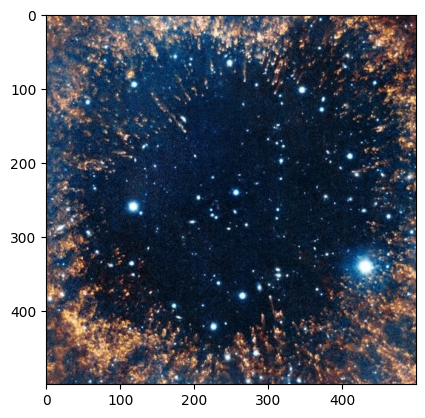

In [3]:
height, width, _ = np.shape(imageArray)
croppedImageArray = imageArray[height // 2 - 250 : height // 2 + 250, width // 2 - 250 : width // 2 + 250, :]

pl.imshow(croppedImageArray)
pl.show()

There is a very bright blue star at the right-hand side of the cropped image. Let's see if we can find the horizontal ($x$) coordinate for the center of that star using the following process:

1. Plot the cropped image again, but only the blue channel of the image this time, and only the $y$ pixels from 300 to 400 (since we can clearly see it's between that range). Save this to a new variable called `blueCroppedImageArray` and plot it. You will see that the star is visually the brightest object in `blueCroppedImageArray`.


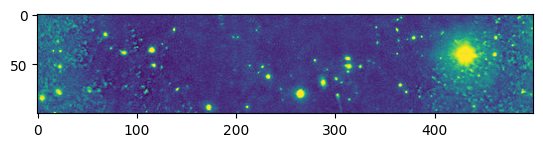

In [4]:
blueCroppedImageArray = croppedImageArray[300:400, :, 2]

pl.imshow(blueCroppedImageArray)
pl.show()

2. Add all of the rows in `blueCroppedImageArray` together, resulting in a 1D array called `columnBrightnesses` with length 500 (the width of the cropped image) that has elements representing the total brightness of each column in the cropped image.

In [5]:
columnBrightnesses = np.zeros(500)
for row in blueCroppedImageArray:
    columnBrightnesses += row

3. Display a line plot of `columnBrightnesses` and see that it peaks at the star's $x$ coordinate in the cropped image.

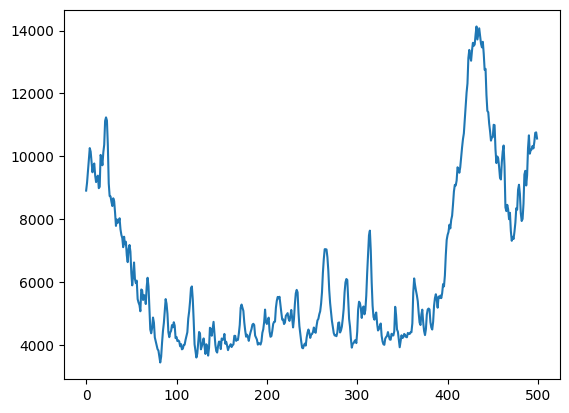

In [6]:
pl.plot(columnBrightnesses)
pl.show()

4. Use a for loop over `columnBrightnesses` to identify the pixel corresponding to that peak. What is the location of this peak? Print it.

In [7]:
maxColumnBrightness = 0
maxColumnBrightnessIndex = -1
for index, brightness in enumerate(columnBrightnesses):
    if brightness > maxColumnBrightness:
        maxColumnBrightness = brightness
        maxColumnBrightnessIndex = index

print(maxColumnBrightnessIndex)

432


Is that value correct? Plot `croppedImageArray` again with a white vertical line plotted over it at that pixel (the line should span from 0 to 500 pixels to fully cross the image). We can use `matplotlib`'s `imshow` and `plot` together on successive lines to do this.

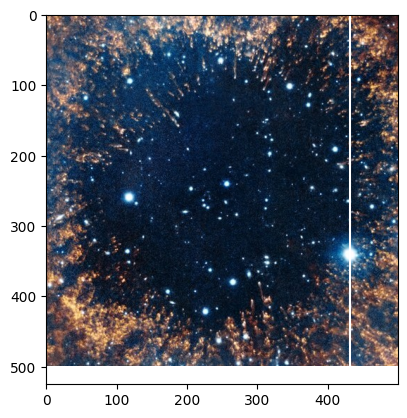

In [8]:
pl.imshow(croppedImageArray)
pl.plot([maxColumnBrightnessIndex, maxColumnBrightnessIndex], [0, 500], color="white")
pl.show()

Use the same basic procedure to find the $y$ value for the center of the star, and plot the image with two white lines (one vertical and one horizontal) that cross at the center of the star. (Remember that `numpy` arrays can be transposed to easily rotate them. This may or may not make the process easier for you, depending on how you solve this.)

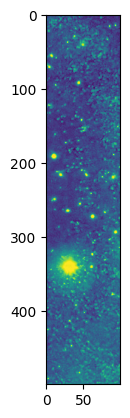

In [9]:
blueCroppedImage = croppedImageArray[:, 400:500, 2]

pl.imshow(blueCroppedImage)
pl.show()

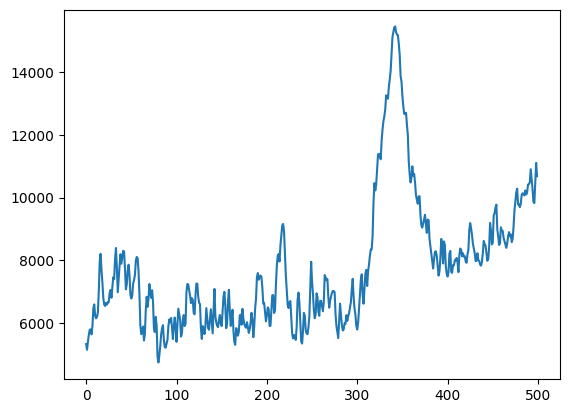

In [10]:
rowBrightnesses = np.zeros(500)
for row in blueCroppedImage.T:
    rowBrightnesses += row

pl.plot(rowBrightnesses)
pl.show()

In [11]:
maxRowBrightness = 0
maxRowBrightnessIndex = -1
for index, brightness in enumerate(rowBrightnesses):
    if brightness > maxRowBrightness:
        maxRowBrightness = brightness
        maxRowBrightnessIndex = index

print(maxRowBrightnessIndex)

342


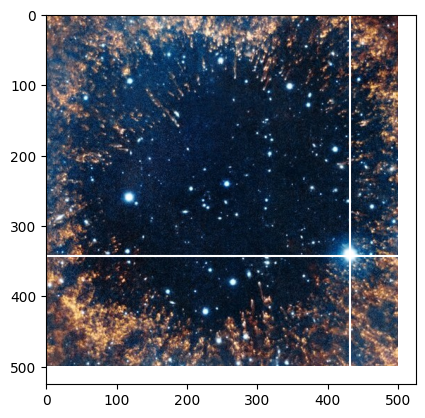

In [12]:
pl.imshow(croppedImageArray)
pl.plot([maxColumnBrightnessIndex, maxColumnBrightnessIndex], [0, 500], color="white")
pl.plot([0, 500], [maxRowBrightnessIndex, maxRowBrightnessIndex], color="white")
pl.show()

Now get the central coordinates ($x$, $y$) of the star in `imageArray` (the original one you plotted without any cropping). Plot this full image with the white lines crossing over the center of the star.

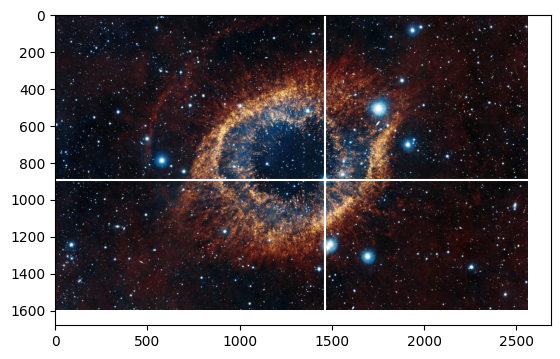

In [13]:
height, width, _ = np.shape(imageArray)

croppedStartY = height // 2 - 250  # Remember that we did this originally to crop
croppedStartX = width // 2 - 250

y = croppedStartY + maxRowBrightnessIndex
x = croppedStartX + maxColumnBrightnessIndex

pl.imshow(imageArray)
pl.plot([x, x], [0, height], color="white")
pl.plot([0, width], [y, y], color="white")
pl.show()

Print a formatted string statement of `"The star is located at (x, y) = (X_POSITION, Y_POSITION)."`, where `X_POSITION` and `Y_POSITION` are the values you found for the star's coordinates.

In [14]:
print(f"The star is located at (x, y) = ({x}, {y}).")

The star is located at (x, y) = (1462, 892).
